
---
<font  size = "50">**Devices Price Classification System**</font>

---



### Task 1:  <a href="#Importing"> Importing libraries and Exploring the Dataset.</a>

### Task 2:  <a href="#Checking">Checking missing values and Outliers & Creating visual methods to analyze the data.</a>

### Task 3: <a href="#Feature">Feature importance, Selection & Extractio.</a>

### Task 4: <a href="#model">creat a model that fits the data.</a>

### Task 5: <a href="#accurecy">creating an accurecy table.</a>

### Task 6: <a href="#Enhancment">Models Enhancment Techniques.</a>

### Task 7: <a href="#Ensamble">Ensemble Learning.</a>

---

<a id='Importing'></a>
## Task 1: Importing libraries and Exploring the Dataset.

In [ ]:
#libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import pickle
from sklearn.preprocessing import OrdinalEncoder

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

pd.reset_option('display.max_rows')

In [ ]:
#Read the data frame
df = pd.read_csv("Devices Price Classification System-train - train.csv")

In [ ]:
# take a look
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1.0,0.0,7.0,0.6,188.0,2.0,...,20.0,756.0,2549.0,9.0,7.0,19,0,0,1,1
1,1021,1,0.5,1,0.0,1.0,53.0,0.7,136.0,3.0,...,905.0,1988.0,2631.0,17.0,3.0,7,1,1,0,2
2,563,1,0.5,1,2.0,1.0,41.0,0.9,145.0,5.0,...,1263.0,1716.0,2603.0,11.0,2.0,9,1,1,0,2
3,615,1,2.5,0,0.0,0.0,10.0,0.8,131.0,6.0,...,1216.0,1786.0,2769.0,16.0,8.0,11,1,0,0,2
4,1821,1,1.2,0,13.0,1.0,44.0,0.6,141.0,2.0,...,1208.0,1212.0,1411.0,8.0,2.0,15,1,1,0,1




- **battery_power** - Total energy a battery can store in one time measured in mAh


- **blue** - Has Bluetooth or not


- **clock_speed** - The speed at which the microprocessor executes instructions


- **dual_sim** - Has dual sim support or not


- **fc** - Front Camera megapixels


- **four_g** - Has 4G or not


- **int_memory** - Internal Memory in Gigabytes


- **m_dep** - Mobile Depth in cm


- **mobile_wt** - Weight of mobile phone


- **n_cores** - Number of cores of the processor


- **pc** - Primary Camera megapixels


- **px_height** - Pixel Resolution Height


- **px_width** - Pixel Resolution Width


- **ram** - Random Access Memory in Megabytes


- **sc_h** - Screen Height of mobile in cm


- **sc_w** - Screen Width of mobile in cm


- **talk_time** - longest time that a single battery charge will last when you are


- **three_g** - Has 3G or not


- **touch_screen** - Has touch screen or not


- **wifi** - Has wifi or not


- **price_range** - This is the target variable with the value of:
    - 0 -> (low cost)
    - 1 -> (medium cost)
    - 2 -> (high cost)
    - 3 -> (very high cost)

In [ ]:
# check the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             1995 non-null   float64
 5   four_g         1995 non-null   float64
 6   int_memory     1995 non-null   float64
 7   m_dep          1995 non-null   float64
 8   mobile_wt      1996 non-null   float64
 9   n_cores        1996 non-null   float64
 10  pc             1995 non-null   float64
 11  px_height      1996 non-null   float64
 12  px_width       1998 non-null   float64
 13  ram            1998 non-null   float64
 14  sc_h           1999 non-null   float64
 15  sc_w           1999 non-null   float64
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

- The data should consist of 2000 instances with 21 attributes
- 8 integer , 13 float
- there are some coloumns contian null values


In [ ]:
# lets see some statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.518500,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.495000,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.522250,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.509500,0.500035,0.0,0.00,1.0,1.00,1.0
fc,1995.0,4.310276,4.335766,0.0,1.00,3.0,7.00,19.0
four_g,1995.0,0.521303,0.499671,0.0,0.00,1.0,1.00,1.0
int_memory,1995.0,32.048120,18.146476,2.0,16.00,32.0,48.00,64.0
m_dep,1995.0,0.502256,0.288530,0.1,0.20,0.5,0.80,1.0
mobile_wt,1996.0,140.266533,35.384676,80.0,109.00,141.0,170.00,200.0
n_cores,1996.0,4.518036,2.288946,1.0,3.00,4.0,7.00,8.0


- The stats shows that the continous coloumns are almost uniformly distributed

In [ ]:
# Check int coloumns where are they continous or categorical
print('battery_power')
print(df['battery_power'].unique())

print('blue')
print(df['blue'].unique())

print('dual_sim')
print(df['dual_sim'].unique())

print('talk_time')
print(df['talk_time'].unique())

print('three_g')
print(df['three_g'].unique())

print('touch_screen')
print(df['touch_screen'].unique())

print('wifi')
print(df['wifi'].unique())

print('price_range')
print(df['price_range'].unique())

battery_power
[ 842 1021  563 ... 1139 1467  858]
blue
[0 1]
dual_sim
[0 1]
talk_time
[19  7  9 11 15 10 18  5 20 12 13  2  4  3 16  6 14 17  8]
three_g
[0 1]
touch_screen
[0 1]
wifi
[1 0]
price_range
[1 2 3 0]


---

<a id='Checking'></a>
## Task 2: Checking missing values and Outliers & Creating visual methods to analyze the data.

In [ ]:
#CHECKING the no. of NULL VALUES
nulls=df.isnull().sum()
nulls

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               5
four_g           5
int_memory       5
m_dep            5
mobile_wt        4
n_cores          4
pc               5
px_height        4
px_width         2
ram              2
sc_h             1
sc_w             1
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             1995 non-null   float64
 5   four_g         1995 non-null   float64
 6   int_memory     1995 non-null   float64
 7   m_dep          1995 non-null   float64
 8   mobile_wt      1996 non-null   float64
 9   n_cores        1996 non-null   float64
 10  pc             1995 non-null   float64
 11  px_height      1996 non-null   float64
 12  px_width       1998 non-null   float64
 13  ram            1998 non-null   float64
 14  sc_h           1999 non-null   float64
 15  sc_w           1999 non-null   float64
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
def outlier_percent(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    minimum = Q1 - (1.5 * IQR)
    maximum = Q3 + (1.5 * IQR)
    num_outliers =  np.sum((data < minimum) |(data > maximum))
    num_total = data.count()
    return (num_outliers/num_total)*100



#detecting the outliers in continous coloumns
c=['battery_power' , 'clock_speed' , 'fc' ,'four_g','int_memory','m_dep','mobile_wt' ,'n_cores','pc' ,'px_height','px_width','ram' ,'sc_h' ,'sc_w','talk_time']
for column in c:
    data = df[column]
    percent = str(round(outlier_percent(data), 2))
    print(f'Outliers in "{column}": {percent}%')

Outliers in "battery_power": 0.0%
Outliers in "clock_speed": 0.0%
Outliers in "fc": 0.9%
Outliers in "four_g": 0.0%
Outliers in "int_memory": 0.0%
Outliers in "m_dep": 0.0%
Outliers in "mobile_wt": 0.0%
Outliers in "n_cores": 0.0%
Outliers in "pc": 0.0%
Outliers in "px_height": 0.1%
Outliers in "px_width": 0.0%
Outliers in "ram": 0.0%
Outliers in "sc_h": 0.0%
Outliers in "sc_w": 0.0%
Outliers in "talk_time": 0.0%


In [ ]:
# replace outliers with nulls
for column in c:
    data = df[column]

    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    minimum = Q1 - (1.5 * IQR)
    maximum = Q3 + (1.5 * IQR)

    outliers = ((data < minimum) |(data > maximum))
    df[column].loc[outliers] = np.nan


In [ ]:
#CHECKING the no. of NULL VALUES
nulls=df.isnull().sum()
nulls

battery_power     0
blue              0
clock_speed       0
dual_sim          0
fc               23
four_g            5
int_memory        5
m_dep             5
mobile_wt         4
n_cores           4
pc                5
px_height         6
px_width          2
ram               2
sc_h              1
sc_w              1
talk_time         0
three_g           0
touch_screen      0
wifi              0
price_range       0
dtype: int64

In [ ]:
# Drop null values
df.dropna(inplace = True)

In [ ]:
# Creating the new feature for screen resolution
df['screen_resolution'] = df['px_height'] * df['px_width']

# Defining ranges for different screen resolutions
resolution_types = {
    'HD': (0, 921600),          # 720p HD (1280x720)
    'HD+': (921600, 2073600),   # 900p HD+ (1600x900)
    'Full HD': (2073600, 3686400),  # 1080p Full HD (1920x1080)
    'QHD': (3686400, 8294400),  # 1440p QHD (2560x1440)
    '4K UHD': (8294400, float('inf'))  # 2160p 4K UHD (3840x2160)
}

# Function to categorize resolution type
def categorize_resolution(resolution):
    for res_type, (lower, upper) in resolution_types.items():
        if lower <= resolution < upper:
            return res_type
    return 'Unknown'

# Applying the function to create a new column for resolution type
df['screen_resolution'] = df['screen_resolution'].apply(categorize_resolution)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1971 entries, 0 to 1999
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   battery_power      1971 non-null   float64
 1   blue               1971 non-null   int64  
 2   clock_speed        1971 non-null   float64
 3   dual_sim           1971 non-null   int64  
 4   fc                 1971 non-null   float64
 5   four_g             1971 non-null   float64
 6   int_memory         1971 non-null   float64
 7   m_dep              1971 non-null   float64
 8   mobile_wt          1971 non-null   float64
 9   n_cores            1971 non-null   float64
 10  pc                 1971 non-null   float64
 11  px_height          1971 non-null   float64
 12  px_width           1971 non-null   float64
 13  ram                1971 non-null   float64
 14  sc_h               1971 non-null   float64
 15  sc_w               1971 non-null   float64
 16  talk_time          1971 non-n

In [ ]:
print('screen_resolution')
print(df['screen_resolution'].value_counts())

screen_resolution
screen_resolution
HD         1244
HD+         514
Full HD     208
QHD           5
Name: count, dtype: int64


In [ ]:
# Dictionary mapping resolution types to numerical values
resolution_numerical_mapping = {
    'HD': 1,
    'HD+': 2,
    'Full HD': 3,
    'QHD': 4,
    '4K UHD': 5
}

# Applying the mapping to create a new column with numerical values
df['screen_resolution'] = df['screen_resolution'].map(resolution_numerical_mapping)

In [ ]:
numerical_columns = ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt',
                     'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']

# sns.pairplot(df, vars=numerical_columns, hue='price_range')
# plt.show()

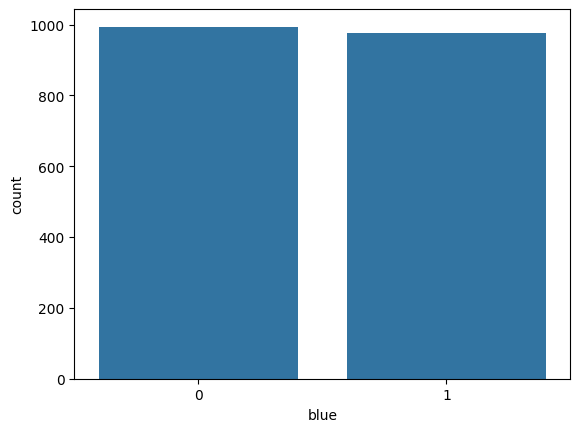

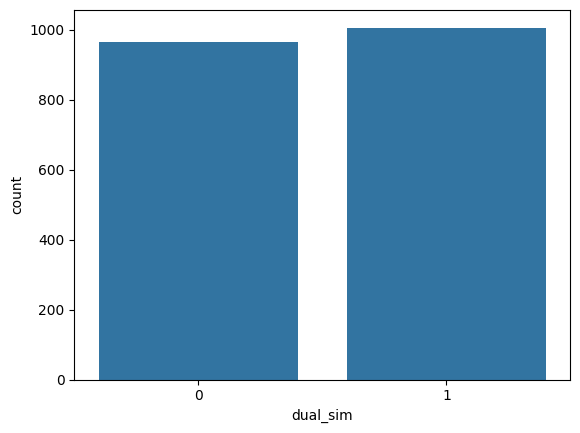

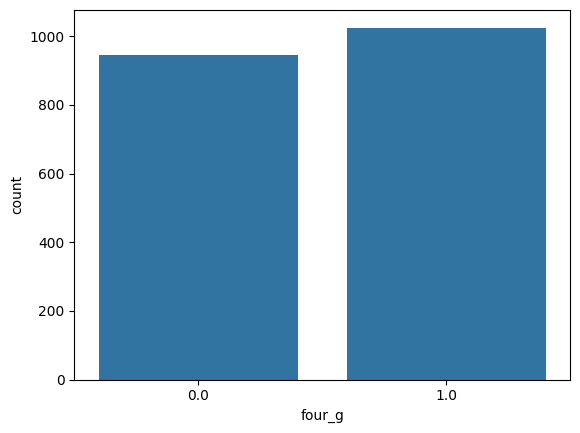

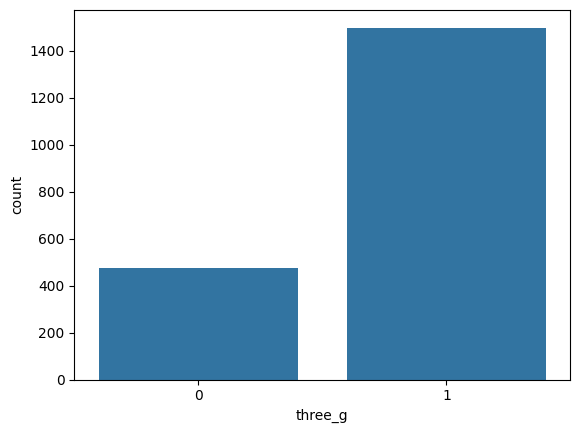

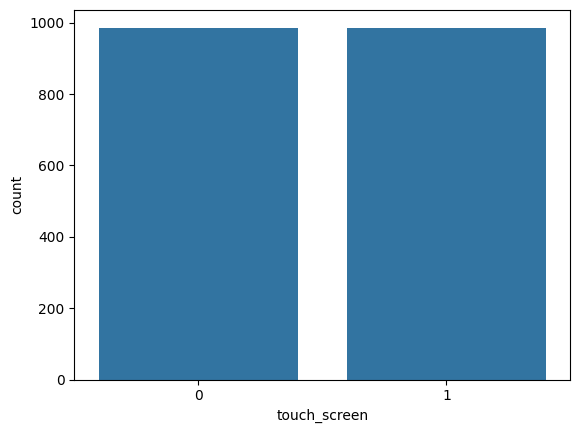

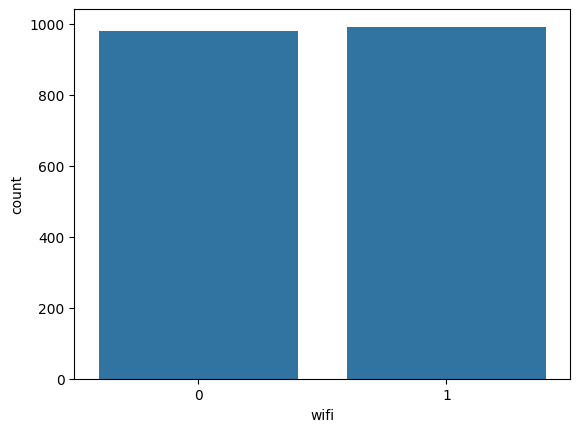

In [ ]:
# Bar Charts for categorical columns
categorical_columns = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']
for column in categorical_columns:
    sns.countplot(x=column, data=df)
    plt.show()

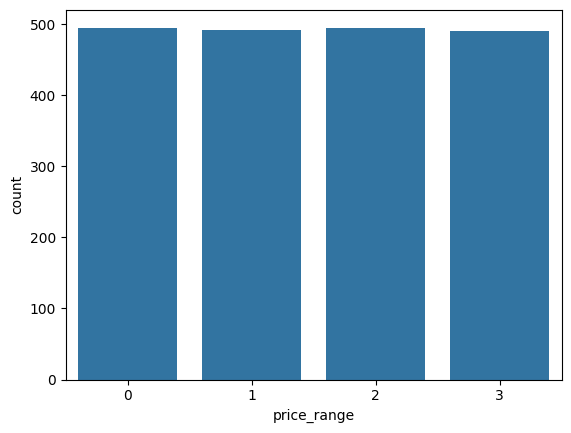

In [ ]:
# Countplot for target variable
sns.countplot(x='price_range', data=df)
plt.show()

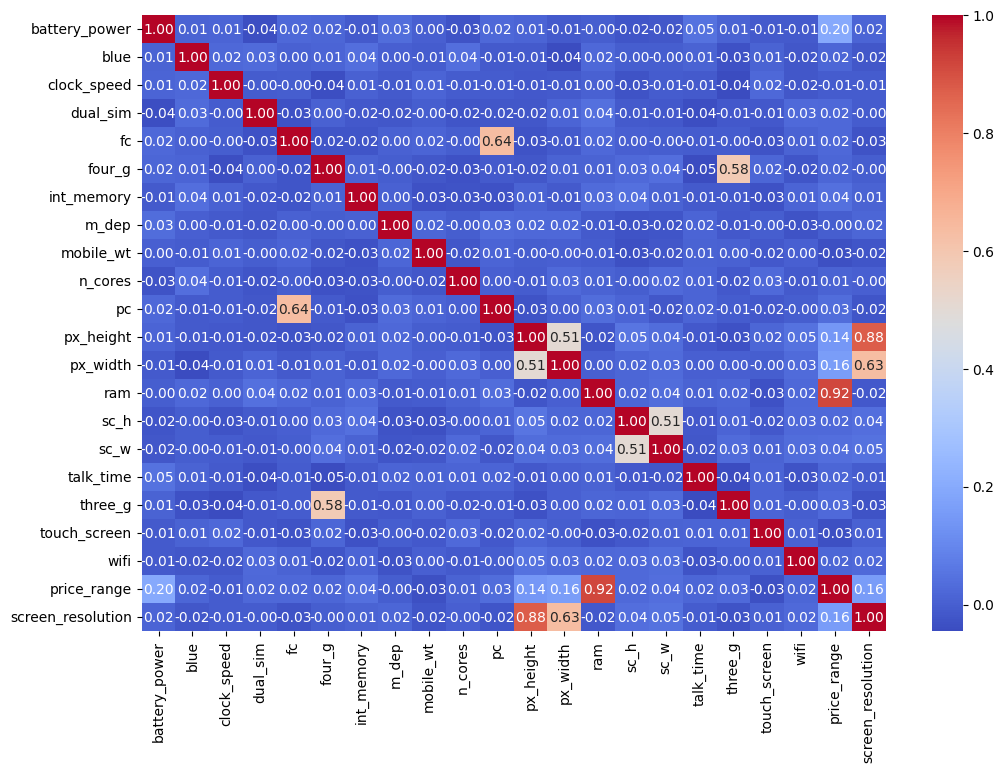

In [ ]:
# Heatmap for correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

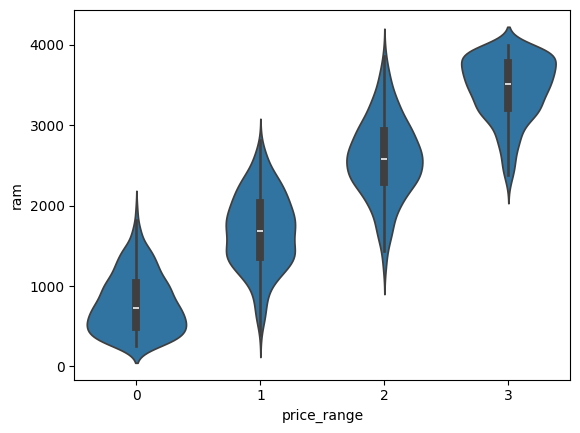

In [ ]:
# Violin Plots
for column in ['price_range']:
    sns.violinplot(x=column, y='ram', data=df)
    plt.show()

<a id='Feature'></a>
## Task 3: Feature importance, Selection & Extraction .

In [ ]:
# Splitting the data into X and y
X = df.drop(['price_range'], axis=1)
y = df['price_range'].values

In [ ]:
from sklearn.feature_selection import SelectPercentile, f_classif

x_temp = X
y_temp = y

# Apply F-test
FeatureSelection = SelectPercentile(score_func=f_classif, percentile=95)
X = FeatureSelection.fit_transform(x_temp, y_temp)

# Get selected feature indices
selected_features_indices = FeatureSelection.get_support(indices=True)

# Get the names of selected features
selected_features_names = x_temp.columns[selected_features_indices]

# Output selected feature names
for i, feature_name in enumerate(selected_features_names):
    print(f'{feature_name}: {FeatureSelection.get_support()[i]}')

battery_power: True
clock_speed: False
dual_sim: True
fc: True
four_g: True
int_memory: True
m_dep: True
mobile_wt: True
n_cores: True
pc: True
px_height: True
px_width: True
ram: True
sc_h: True
sc_w: True
talk_time: True
three_g: True
touch_screen: True
screen_resolution: True


In [ ]:
# Splitting the data into X and y
X = df.drop(['price_range' , 'clock_speed'], axis=1)
y = df['price_range'].values

In [ ]:
from sklearn.model_selection import train_test_split


# split the data to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

# Example using Random Forest feature importances
embed = SelectFromModel(RandomForestClassifier(n_estimators=100))
embed.fit(X_train, y_train)
X_new_RF = embed.transform(X_train)
X_new_RF

array([[1663.,  951., 1545., 1336.],
       [1878.,  210., 1026., 1334.],
       [1619.,  813., 1180.,  464.],
       ...,
       [1444., 1092., 1554., 2540.],
       [ 603., 1003., 1284., 1543.],
       [1285.,  475.,  500., 2094.]])

In [ ]:
from sklearn.decomposition import PCA

# Example using Principal Component Analysis (PCA)
pca = PCA(n_components=5)
X_new_PCA = pca.fit_transform(X_train)
X_new_PCA

array([[-7.87143326e+02,  4.18777560e+02,  4.10680625e+02,
         6.68721820e+00, -6.20326812e+00],
       [-7.77823193e+02, -4.72761871e+02,  6.28493983e+02,
         1.56189641e+02,  5.48344782e+01],
       [-1.65383394e+03,  5.23144190e+01,  3.64494790e+02,
        -1.57701439e+02,  2.26831221e+01],
       ...,
       [ 4.17067804e+02,  5.42386344e+02,  2.05608712e+02,
        -9.36344739e+01,  5.93400371e+01],
       [-5.67776516e+02,  2.69670180e+02, -6.40103382e+02,
        -2.43795628e+02,  2.49500946e+01],
       [-1.08294194e+01, -6.42099784e+02,  5.89731719e+01,
        -4.22559807e+02,  1.43864626e+00]])

In [ ]:
train_data = [ X_train , X_new_RF , X_new_PCA]

In [ ]:
test_PCA = pca.transform(X_test)

In [ ]:
test_RF = embed.transform(X_test)

In [ ]:
test_data = [X_test, test_RF , test_PCA]

<a id='model'></a>
## Task 4: creat a model that fits the data.

In [ ]:
model= []
acc = []

### Random Forest

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


H_acc = 0.0
c = 0
rf_classifier = RandomForestClassifier(random_state=42)
for X in train_data:


    # Train the model on the training data
    rf_classifier.fit(X, y_train)

    # Make predictions on the test data
    y_pred = rf_classifier.predict(test_data[c])

    # Evaluate the model's performance
    accuracy = accuracy_score(y_test, y_pred)
    y_pred_t = rf_classifier.predict(X)
    t_accuracy = accuracy_score(y_train, y_pred_t)
    if (accuracy>H_acc):
        H_acc = accuracy


    conf_matrix = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    c+=1
    print(f"Data: {c}")
    print(f"Train Accuracy: {t_accuracy:.2f}")
    print(f"Accuracy: {accuracy:.2f}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("Classification Report:")
    print(classification_rep)
    print("###################################################")





model.append("RF")
acc.append(H_acc)

Data: 1
Train Accuracy: 1.00
Accuracy: 0.86
Confusion Matrix:
[[101   8   0   0]
 [  4  71  15   0]
 [  0  11  70   9]
 [  0   0   8  98]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.93      0.94       109
           1       0.79      0.79      0.79        90
           2       0.75      0.78      0.77        90
           3       0.92      0.92      0.92       106

    accuracy                           0.86       395
   macro avg       0.85      0.85      0.85       395
weighted avg       0.86      0.86      0.86       395

###################################################
Data: 2
Train Accuracy: 1.00
Accuracy: 0.93
Confusion Matrix:
[[105   4   0   0]
 [  3  81   6   0]
 [  0   5  80   5]
 [  0   0   3 103]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       109
           1       0.90      0.90      0.90        90
           2       0.90   

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

H_acc = 0.0
c = 0
dt_clf = DecisionTreeClassifier()
for X in train_data:


    # Fit the model on the training data
    dt_clf.fit(X, y_train)

    # Make predictions on the test data
    y_pred = dt_clf.predict(test_data[c])

    # Evaluate the model's performance
    accuracy = accuracy_score(y_test, y_pred)
    y_pred_t = dt_clf.predict(X)
    t_accuracy = accuracy_score(y_train, y_pred_t)
    if (accuracy>H_acc):
        H_acc = accuracy


    conf_matrix = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    c+=1
    print(f"Data: {c}")
    print(f"Train Accuracy: {t_accuracy:.2f}")
    print(f"Accuracy: {accuracy:.2f}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("Classification Report:")
    print(classification_rep)
    print("###################################################")





model.append("DT")
acc.append(H_acc)

Data: 1
Train Accuracy: 1.00
Accuracy: 0.84
Confusion Matrix:
[[94 15  0  0]
 [ 4 71 15  0]
 [ 0 10 70 10]
 [ 0  0 11 95]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.86      0.91       109
           1       0.74      0.79      0.76        90
           2       0.73      0.78      0.75        90
           3       0.90      0.90      0.90       106

    accuracy                           0.84       395
   macro avg       0.83      0.83      0.83       395
weighted avg       0.84      0.84      0.84       395

###################################################
Data: 2
Train Accuracy: 1.00
Accuracy: 0.88
Confusion Matrix:
[[ 98  11   0   0]
 [  5  74  11   0]
 [  0   8  74   8]
 [  0   0   6 100]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.90      0.92       109
           1       0.80      0.82      0.81        90
           2       0.81      0.82      0.8

### xgboost

In [ ]:
import xgboost as xgb

H_acc = 0.0
c = 0
xgb_clf = xgb.XGBClassifier()
for X in train_data:


    # Fit the model on the training data
    xgb_clf.fit(X, y_train)

    # Make predictions on the test data
    y_pred = xgb_clf.predict(test_data[c])

    # Evaluate the model's performance
    accuracy = accuracy_score(y_test, y_pred)
    y_pred_t = xgb_clf.predict(X)
    t_accuracy = accuracy_score(y_train, y_pred_t)
    if (accuracy>H_acc):
        H_acc = accuracy


    conf_matrix = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    c+=1
    print(f"Data: {c}")
    print(f"Train Accuracy: {t_accuracy:.2f}")
    print(f"Accuracy: {accuracy:.2f}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("Classification Report:")
    print(classification_rep)
    print("###################################################")





model.append("XGB")
acc.append(H_acc)

Data: 1
Train Accuracy: 1.00
Accuracy: 0.93
Confusion Matrix:
[[105   4   0   0]
 [  3  79   8   0]
 [  0   2  81   7]
 [  0   0   3 103]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       109
           1       0.93      0.88      0.90        90
           2       0.88      0.90      0.89        90
           3       0.94      0.97      0.95       106

    accuracy                           0.93       395
   macro avg       0.93      0.93      0.93       395
weighted avg       0.93      0.93      0.93       395

###################################################
Data: 2
Train Accuracy: 1.00
Accuracy: 0.93
Confusion Matrix:
[[105   4   0   0]
 [  3  79   8   0]
 [  0   3  81   6]
 [  0   0   3 103]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       109
           1       0.92      0.88      0.90        90
           2       0.88   

### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

H_acc = 0.0
c = 0
knn_model = KNeighborsClassifier(n_neighbors=5)
for X in train_data:


    knn_model.fit(X, y_train)

    # Make predictions on the test data
    y_pred = knn_model.predict(test_data[c])

    # Evaluate the model's performance
    accuracy = accuracy_score(y_test, y_pred)
    y_pred_t = knn_model.predict(X)
    t_accuracy = accuracy_score(y_train, y_pred_t)
    if (accuracy>H_acc):
        H_acc = accuracy


    conf_matrix = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    c+=1
    print(f"Data: {c}")
    print(f"Train Accuracy: {t_accuracy:.2f}")
    print(f"Accuracy: {accuracy:.2f}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("Classification Report:")
    print(classification_rep)
    print("###################################################")





model.append("KNN")
acc.append(H_acc)

Data: 1
Train Accuracy: 0.95
Accuracy: 0.92
Confusion Matrix:
[[105   4   0   0]
 [  3  78   9   0]
 [  0   3  80   7]
 [  0   0   7  99]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       109
           1       0.92      0.87      0.89        90
           2       0.83      0.89      0.86        90
           3       0.93      0.93      0.93       106

    accuracy                           0.92       395
   macro avg       0.91      0.91      0.91       395
weighted avg       0.92      0.92      0.92       395

###################################################
Data: 2
Train Accuracy: 0.95
Accuracy: 0.91
Confusion Matrix:
[[104   5   0   0]
 [  3  78   9   0]
 [  0   2  80   8]
 [  0   0   7  99]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       109
           1       0.92      0.87      0.89        90
           2       0.83   

### lightgbm

In [ ]:
import lightgbm as lgb

H_acc = 0.0
c = 0
lgbm_clf = lgb.LGBMClassifier()

for X in train_data:

    # Fit the model on the training data
    lgbm_clf.fit(X, y_train)

    # Make predictions on the test data
    y_pred = lgbm_clf.predict(test_data[c])

    # Evaluate the model's performance
    accuracy = accuracy_score(y_test, y_pred)
    y_pred_t = lgbm_clf.predict(X)
    t_accuracy = accuracy_score(y_train, y_pred_t)
    if (accuracy>H_acc):
        H_acc = accuracy


    conf_matrix = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    c+=1
    print(f"Data: {c}")
    print(f"Train Accuracy: {t_accuracy:.2f}")
    print(f"Accuracy: {accuracy:.2f}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("Classification Report:")
    print(classification_rep)
    print("###################################################")





model.append("LGBM")
acc.append(H_acc)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001107 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1336
[LightGBM] [Info] Number of data points in the train set: 1576, number of used features: 20
[LightGBM] [Info] Start training from score -1.406808
[LightGBM] [Info] Start training from score -1.368684
[LightGBM] [Info] Start training from score -1.358758
[LightGBM] [Info] Start training from score -1.412003
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Data: 1
Train Accuracy: 1.00
Accuracy: 0.92
Confusion Matrix:
[[102   7   0   0]
 [  4  76  10   0]
 [  0   2  82   6]
 [  0   0   4 102]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       109
           

<a id='accurecy'></a>
## Task 5: creating an accurecy table.


Text(0.5, 1.0, 'Coclusion')

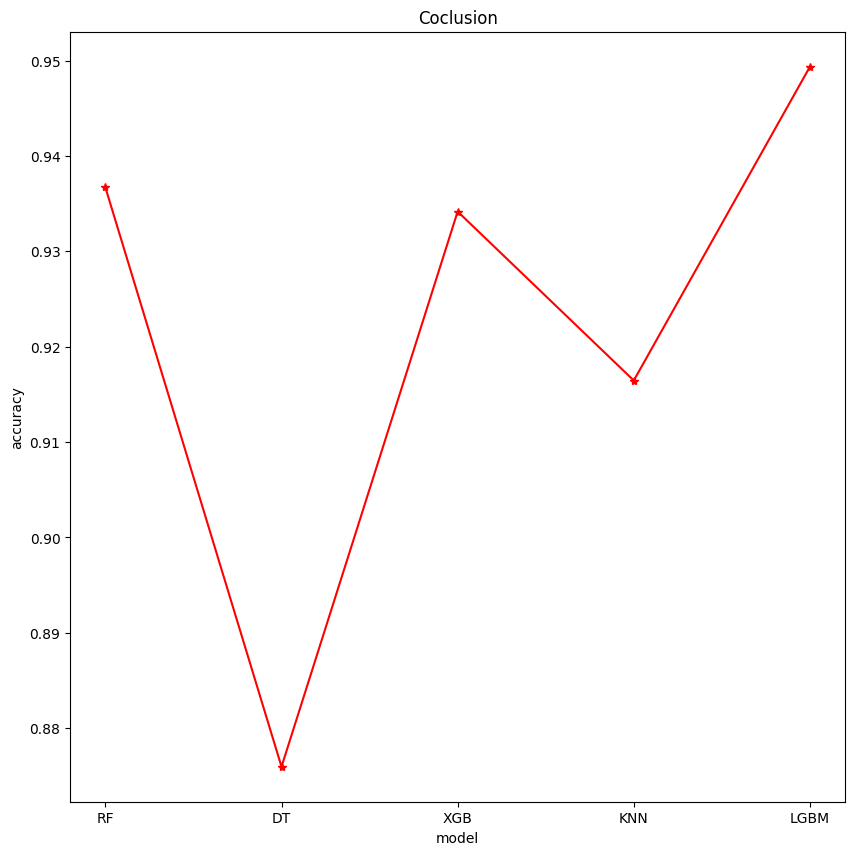

In [ ]:
plt.figure(figsize= (10,10))
plt.plot(model, acc, 'r*-') # 'r' is the color red
plt.xlabel('model')
plt.ylabel('accuracy')
plt.title('Coclusion')

<a id='Enhancment'></a>
## Task 6: Models Enhancment Techniques.

### Random Forest

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize RandomForestClassifier
rf_clf = RandomForestClassifier()

# Initialize GridSearchCV for Random Forest
rf_grid_search = GridSearchCV(estimator=rf_clf, param_grid=rf_param_grid, cv=3, scoring='accuracy')

# Fit the model using grid search
rf_grid_search.fit(X_new_PCA, y_train)

# Get the best estimator
best_rf_clf = rf_grid_search.best_estimator_

# Make predictions on the test data
y_pred_rf = best_rf_clf.predict(test_PCA)

# Evaluate the model's performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)
y_pred_t_rf = best_rf_clf.predict(X_new_PCA)
t_accuracy_rf = accuracy_score(y_train, y_pred_t_rf)

conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)

print(f"Train Accuracy (Random Forest): {t_accuracy_rf:.2f}")
print(f"Accuracy (Random Forest): {accuracy_rf:.2f}")
print("Confusion Matrix (Random Forest):")
print(conf_matrix_rf)
print("Classification Report (Random Forest):")
print(classification_rep_rf)
print("###################################################")


Train Accuracy (Random Forest): 1.00
Accuracy (Random Forest): 0.93
Confusion Matrix (Random Forest):
[[106   3   0   0]
 [  3  79   8   0]
 [  0   4  81   5]
 [  0   0   3 103]]
Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       109
           1       0.92      0.88      0.90        90
           2       0.88      0.90      0.89        90
           3       0.95      0.97      0.96       106

    accuracy                           0.93       395
   macro avg       0.93      0.93      0.93       395
weighted avg       0.93      0.93      0.93       395

###################################################


### xgboost

In [ ]:
from sklearn.model_selection import GridSearchCV


# Define the parameter grid to search
xgb_param_grid = {
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [50, 100, 200]
}

# Initialize XGBClassifier
xgb_clf = xgb.XGBClassifier()

# Initialize GridSearchCV for XGBoost
xgb_grid_search = GridSearchCV(estimator=xgb_clf, param_grid=xgb_param_grid, cv=3, scoring='accuracy')

# Fit the model using grid search
xgb_grid_search.fit(X_new_PCA, y_train)

# Get the best estimator
best_xgb_clf = xgb_grid_search.best_estimator_

# Make predictions on the test data
y_pred_xgb = best_xgb_clf.predict(test_PCA)

# Evaluate the model's performance
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
y_pred_t_xgb = best_xgb_clf.predict(X_new_PCA)
t_accuracy_xgb = accuracy_score(y_train, y_pred_t_xgb)

conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
classification_rep_xgb = classification_report(y_test, y_pred_xgb)

print(f"Train Accuracy (XGBoost): {t_accuracy_xgb:.2f}")
print(f"Accuracy (XGBoost): {accuracy_xgb:.2f}")
print("Confusion Matrix (XGBoost):")
print(conf_matrix_xgb)
print("Classification Report (XGBoost):")
print(classification_rep_xgb)
print("###################################################")


Train Accuracy (XGBoost): 1.00
Accuracy (XGBoost): 0.93
Confusion Matrix (XGBoost):
[[105   4   0   0]
 [  3  80   7   0]
 [  0   2  79   9]
 [  0   0   3 103]]
Classification Report (XGBoost):
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       109
           1       0.93      0.89      0.91        90
           2       0.89      0.88      0.88        90
           3       0.92      0.97      0.94       106

    accuracy                           0.93       395
   macro avg       0.93      0.93      0.93       395
weighted avg       0.93      0.93      0.93       395

###################################################


### KNN

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
knn_param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Initialize KNeighborsClassifier
knn_clf = KNeighborsClassifier()

# Initialize GridSearchCV for KNN
knn_grid_search = GridSearchCV(estimator=knn_clf, param_grid=knn_param_grid, cv=3, scoring='accuracy')

# Fit the model using grid search
knn_grid_search.fit(X_new_PCA, y_train)

# Get the best estimator
best_knn_clf = knn_grid_search.best_estimator_

# Make predictions on the test data
y_pred_knn = best_knn_clf.predict(test_PCA)

# Evaluate the model's performance
accuracy_knn = accuracy_score(y_test, y_pred_knn)
y_pred_t_knn = best_knn_clf.predict(X_new_PCA)
t_accuracy_knn = accuracy_score(y_train, y_pred_t_knn)


conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
classification_rep_knn = classification_report(y_test, y_pred_knn)

print(f"Train Accuracy (KNN): {t_accuracy_knn:.2f}")
print(f"Accuracy (KNN): {accuracy_knn:.2f}")
print("Confusion Matrix (KNN):")
print(conf_matrix_knn)
print("Classification Report (KNN):")
print(classification_rep_knn)
print("###################################################")


Train Accuracy (KNN): 1.00
Accuracy (KNN): 0.92
Confusion Matrix (KNN):
[[104   5   0   0]
 [  4  80   6   0]
 [  0   2  79   9]
 [  0   0   7  99]]
Classification Report (KNN):
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       109
           1       0.92      0.89      0.90        90
           2       0.86      0.88      0.87        90
           3       0.92      0.93      0.93       106

    accuracy                           0.92       395
   macro avg       0.91      0.91      0.91       395
weighted avg       0.92      0.92      0.92       395

###################################################


### LGBM

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'num_leaves': [30, 50, 100],
    'max_depth': [-1, 5, 10],
    'learning_rate': [0.01, 0.05, 0.1]
}

# Initialize LGBMClassifier
lgbm_clf = lgb.LGBMClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=lgbm_clf, param_grid=param_grid, cv=3, scoring='accuracy')

# Fit the model using grid search
grid_search.fit(X_new_PCA, y_train)

# Get the best estimator
best_lgbm_clf = grid_search.best_estimator_

# Make predictions on the test data
y_pred = best_lgbm_clf.predict(test_PCA)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
y_pred_t = best_lgbm_clf.predict(X)
t_accuracy = accuracy_score(y_train, y_pred_t)


conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Train Accuracy: {t_accuracy:.2f}")
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)
print("###################################################")




Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

<a id='Ensamble'></a>
## Task 7: Ensemble Learning.

In [ ]:
from sklearn.ensemble import VotingClassifier

# Combine predictions using VotingClassifier
voting_clf = VotingClassifier(estimators=[
    ('lgb', best_lgbm_clf), ('xgb', best_xgb_clf), ('rf', best_rf_clf), ('knn', best_knn_clf)
], voting='hard')

voting_clf.fit(X_new_PCA, y_train)
ensemble_pred = voting_clf.predict(test_PCA)

# Evaluate ensemble
ensemble_accuracy = accuracy_score(y_test, ensemble_pred)
print("Ensemble Accuracy:", ensemble_accuracy)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000153 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 1576, number of used features: 5
[LightGBM] [Info] Start training from score -1.406808
[LightGBM] [Info] Start training from score -1.368684
[LightGBM] [Info] Start training from score -1.358758
[LightGBM] [Info] Start training from score -1.412003
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Ensemble Accuracy: 0.9291139240506329


In [ ]:

# Define the test sample as a dictionary
test_sample = {
    'battery_power': 1043,
    'blue': 1,
    'dual_sim': 1,
    'fc': 14,
    'four_g': 0,
    'int_memory': 5,
    'm_dep': 0.1,
    'mobile_wt': 193,
    'n_cores': 3,
    'pc': 16,
    'px_height': 226,
    'px_width': 1412,
    'ram': 3476,
    'sc_h': 12,
    'sc_w': 7,
    'talk_time': 2,
    'three_g': 0,
    'touch_screen': 1,
    'wifi': 0
}



In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

# Define a function for creating the screen resolution feature
def create_screen_resolution(df):
    resolution_types = {
      1: (0, 921600),
      2: (921600, 2073600),
      3: (2073600, 3686400),
      4: (3686400, 8294400),
      5: (8294400, float('inf'))
    }

    df['screen_resolution'] = df['px_height'] * df['px_width']
    df['screen_resolution'] = df['screen_resolution'].map(resolution_types)
    return df

# Create a pipeline
pipeline = Pipeline([

    # Step 2: Impute missing values
    ('imputer', SimpleImputer(strategy='mean')),

    # Step 3: PCA transformation
    ('pca', PCA(n_components=5)),

    # Step 4: Ensemble Classifier
    ('voting_clf', VotingClassifier(estimators=[
        ('lgb', best_lgbm_clf),
        ('xgb', best_xgb_clf),
        ('rf', best_rf_clf),
        ('knn', best_knn_clf)
    ], voting='hard'))
])

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Predict using the pipeline
ensemble_pred = pipeline.predict(create_screen_resolution(pd.DataFrame([test_sample])) )
ensemble_pred
# Evaluate ensemble
ensemble_pred = pipeline.predict(X_test)
ensemble_accuracy = accuracy_score(y_test, ensemble_pred)
print("Ensemble Accuracy:", ensemble_accuracy)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000594 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 1576, number of used features: 5
[LightGBM] [Info] Start training from score -1.406808
[LightGBM] [Info] Start training from score -1.368684
[LightGBM] [Info] Start training from score -1.358758
[LightGBM] [Info] Start training from score -1.412003
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Ensemble Accuracy: 0.9316455696202531


In [ ]:
d = create_screen_resolution(pd.DataFrame([test_sample]))
d.head()

,battery_power,blue,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,screen_resolution
0,1043,1,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0,NaN


In [ ]:
import pickle

# Export the pipeline
with open('pipeline2.pkl', 'wb') as file:
    pickle.dump(pipeline, file)


In [ ]:
# Export the pipeline
with open('pca.pkl', 'wb') as file:
    pickle.dump(pca, file)

In [ ]:
# Export the pipeline
with open('modelv.pkl', 'wb') as file:
    pickle.dump(voting_clf, file)

In [ ]:
! zip -r ./pipeline.pkl.zip ./pipeline.pkl

updating: pipeline.pkl (deflated 74%)


In [ ]:
ensemble_pred = pipeline.predict(pd.DataFrame([test_sample]))
ensemble_pred

array([3])

In [ ]:
import sklearn
sklearn.__version__

'1.2.2'

In [ ]:

with open('pipeline.pkl','rb') as f:
    model = pickle.load(f)

In [ ]:

with open('pipeline.pkl','rb') as f:
    model = pickle.load(f)

In [ ]:
ensemble_pred = model.predict(X_test)
ensemble_accuracy = accuracy_score(y_test, ensemble_pred)
print("Ensemble Accuracy:", ensemble_accuracy)

Ensemble Accuracy: 0.9316455696202531
